# Coveo Interview Assignment

Import Library

In [67]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Use pandas read json function to read the json file

In [68]:
city_search = pd.read_json("city_search.json")

# Data Cleaning 

Take a quick look at the data

In [69]:
city_search.sample(10)

,cities,session_id,unix_timestamp,user
1896,[Vancouver BC],[E50QODXB327U7],[1434603943],"[[{'user_id': 2344, 'joining_date': '2015-03-3..."
10300,[Los Angeles CA],[E7MFSBQ5Y4NTW],[1434747313],"[[{'user_id': 8289, 'joining_date': '2015-03-0..."
19448,"[Houston TX, Arlington TX]",[ME83QL3TDOHF6],[1441360899],"[[{'user_id': 4925, 'joining_date': '2015-03-0..."
8877,"[New York NY, Jersey City NJ]",[TSYP8SDSR4FMW],[1442817556],"[[{'user_id': 7490, 'joining_date': '2015-03-0..."
16611,"[Jacksonville FL, Montreal QC, New York NY]",[YQLVU0JZRNNR2],[1428736626],"[[{'user_id': 8828, 'joining_date': '2015-03-1..."
19783,[Toronto ON],[KFKSDM4AD86EV],[1431868735],"[[{'user_id': 6587, 'joining_date': '2015-03-0..."
6592,"[OTTAWA ON, Montreal QC]",[OPWSS6P1Q0KIV],[1443001221],"[[{'user_id': 3344, 'joining_date': '2015-03-0..."
13797,"[Chicago IL, New York NY]",[5MNT62WUG4Z07],[1441109686],"[[{'user_id': 5953, 'joining_date': '2015-03-2..."
10833,"[Edmonton AB, Los Angeles CA]",[2DZ4172OEAGVX],[1442508469],"[[{'user_id': 3422, 'joining_date': '2015-03-0..."
7494,"[Toronto ON, Chicago IL]",[00LSZNZZ35S08],[1428881462],"[[{'user_id': 4444, 'joining_date': '2015-03-2..."


Summary statistic

In [64]:
city_search.describe()

,cities,session_id,unix_timestamp,user
count,20022,20022,20022,20022
unique,1329,20022,20003,20022
top,[New York NY],[SQQYVT2YZRSCX],[1437476170],"[[{'user_id': 1001, 'joining_date': '2015-04-0..."
freq,2278,1,2,1


Check missing values

In [70]:
city_search.isnull().sum()

cities            0
session_id        0
unix_timestamp    0
user              0
dtype: int64

**Observation:** <br>
1. The data contains no null value, no need to inpute
2. the "cities" columns is the list of city names, string
3. the session id unique
4. Need to feature engineer the user column to include them in features
5. unix time stamp is currently not human readable format, may or may not need to convert to make it an useful feature

Ensure the data type is correct for each column

In [73]:
city_search.dtypes

cities            object
session_id        object
unix_timestamp    object
user              object
dtype: object

In [77]:
city_test = city_search['cities'][0]
print("length of the list:", len(city_test))
print(city_test)
print(city_test[0])

length of the list: 1
['New York NY, Newark NJ']
New York NY, Newark NJ


**Cities are not stored in to data frame correctly, we need to make it a list of strings**

- Make the cities column a list of strings

In [78]:
city_search['cities'] = city_search['cities'].apply(lambda x:x[0])
city_search['cities'] = city_search['cities'].str.split(',')
city_search['cities'] = city_search['cities'].apply(lambda lis:[x.strip() for x in lis])
city_search.head()

#Alternatively you can do it with one line of code: city_search['cities'].apply(lambda x:x[0]).str.split(',').apply(lambda lis:[x.strip() for x in lis])

,cities,session_id,unix_timestamp,user
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"[[{'user_id': 2024, 'joining_date': '2015-03-2..."
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"[[{'user_id': 2853, 'joining_date': '2015-03-2..."
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"[[{'user_id': 10958, 'joining_date': '2015-03-..."
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"[[{'user_id': 7693, 'joining_date': '2015-03-1..."
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"[[{'user_id': 7506, 'joining_date': '2015-02-2..."


In [79]:
city_test = city_search['cities'][0]
print("length of the list:", len(city_test))
print(city_test)
print(city_test[0])

length of the list: 2
['New York NY', 'Newark NJ']
New York NY


This is correct

In [13]:
city_search.head()

,cities,session_id,unix_timestamp,user
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"[[{'user_id': 2024, 'joining_date': '2015-03-2..."
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"[[{'user_id': 2853, 'joining_date': '2015-03-2..."
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"[[{'user_id': 10958, 'joining_date': '2015-03-..."
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"[[{'user_id': 7693, 'joining_date': '2015-03-1..."
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"[[{'user_id': 7506, 'joining_date': '2015-02-2..."


## Feature Engineering

- We first engineer the unix_timestamp column to human readable global time, hoping it gives us more insight

In [85]:
city_search['time'] = city_search['unix_timestamp'].map(lambda x: pd.to_datetime(x[0], unit='s'))
city_search['time'].head()

0   2015-09-17 15:28:28
1   2015-09-04 08:06:31
2   2015-08-29 10:18:10
3   2015-03-25 07:21:03
4   2015-05-02 09:31:07
Name: time, dtype: datetime64[ns]

- and then we are going to extract data from user column, assigning them to respective columns 'user_id' and 'country'

In [80]:
city_search['user'] = city_search['user'].apply(lambda x:dict(x[0][0]))
city_search['user_id'] = city_search['user'].map(lambda x:x['user_id'])
city_search['country'] = city_search['user'].map(lambda x:x['country'])

In [17]:
city_search['user_id'].value_counts().head()

4314    12
4404    12
4082    11
7363    10
9252    10
Name: user_id, dtype: int64

**Observation** user_id is not unique, it maybe useful to aggregate them before training

In [81]:
city_search['country'].value_counts()

US    3876
DE    3638
UK    3555
      2820
FR    2298
ES    1953
IT    1882
Name: country, dtype: int64

- remap the buggy country name

In [84]:
city_search['country'] = city_search['country'].map({"":"Unknown"}).fillna(city_search['country'])
city_search['country'].head(10)

0         UK
1         DE
2         UK
3         IT
4         UK
5         ES
6    Unknown
7    Unknown
8         US
9    Unknown
Name: country, dtype: object

## one hot encode the cities columns
- We will one hot encode the cities feature to indicate which cities a user has clicked
- Such sparse matrix is often used for recommeder system or personalization

In [86]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
user_city_mat = mlb.fit_transform(city_search['cities'])
city_search = city_search.join(pd.DataFrame(user_city_mat,columns=mlb.classes_))
city_search.head()

,cities,session_id,unix_timestamp,user,user_id,country,time,Anaheim CA,Arlington TX,Atlanta GA,...,Toledo OH,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"{'user_id': 2024, 'joining_date': '2015-03-22'...",2024,UK,2015-09-17 15:28:28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"{'user_id': 2853, 'joining_date': '2015-03-28'...",2853,DE,2015-09-04 08:06:31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"{'user_id': 10958, 'joining_date': '2015-03-06...",10958,UK,2015-08-29 10:18:10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"{'user_id': 7693, 'joining_date': '2015-03-12'...",7693,IT,2015-03-25 07:21:03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"{'user_id': 7506, 'joining_date': '2015-02-28'...",7506,UK,2015-05-02 09:31:07,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Make a map from city name to the array index, and vice versa for later use

In [88]:
city_index = np.arange(len(mlb.classes_))
city_to_index = dict(zip(mlb.classes_.tolist(), city_index.tolist()))
index_to_city = dict(zip(city_index.tolist(), mlb.classes_.tolist()))
city_to_index

{'Anaheim CA': 0,
 'Arlington TX': 1,
 'Atlanta GA': 2,
 'Austin TX': 3,
 'Bakersfield CA': 4,
 'Baltimore MD': 5,
 'Birmingham AL': 6,
 'Boston MA': 7,
 'Buffalo NY': 8,
 'Calgary AB': 9,
 'Chandler AZ': 10,
 'Charlotte NC': 11,
 'Chesapeake VA': 12,
 'Chicago IL': 13,
 'Cincinnati OH': 14,
 'Cleveland OH': 15,
 'Columbus OH': 16,
 'Corpus Christi TX': 17,
 'Dallas TX': 18,
 'Detroit MI': 19,
 'Edmonton AB': 20,
 'Fort Wayne IN': 21,
 'Fort Worth TX': 22,
 'Fresno CA': 23,
 'Glendale AZ': 24,
 'Greensboro NC': 25,
 'Halifax NS': 26,
 'Hamilton ON': 27,
 'Hialeah FL': 28,
 'Houston TX': 29,
 'Indianapolis IN': 30,
 'Jacksonville FL': 31,
 'Jersey City NJ': 32,
 'Kansas City MO': 33,
 'Kitchener ON': 34,
 'Lexington KY': 35,
 'Lincoln NE': 36,
 'London ON': 37,
 'Long Beach CA': 38,
 'Los Angeles CA': 39,
 'Louisville KY': 40,
 'Madison WI': 41,
 'Memphis TN': 42,
 'Mesa AZ': 43,
 'Miami FL': 44,
 'Milwaukee WI': 45,
 'Minneapolis MN': 46,
 'Montreal QC': 47,
 'Nashville TN': 48,
 'New 

There are 89 cities without errors

- Make helper function to convert the list of cities to a corresponding array for later use

In [89]:
def cities_to_array(city_list):
    """
    Input: list of cities, strings
    Output: Array with the corresponding cities index 1, and its index
    """
    city_array = np.zeros(len(city_to_index))
    city_index = []
    for city in city_list:
        city_array[city_to_index[city]] = 1
        city_index.append(city_to_index[city])
    return city_array, city_index

In [90]:
cities_to_array(['Wichita KS', 'Windsor ON'])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1.]), [87, 88])

In [91]:
city_search.sample(10)

,cities,session_id,unix_timestamp,user,user_id,country,time,Anaheim CA,Arlington TX,Atlanta GA,...,Toledo OH,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON
1632,[Toronto ON],[K24TUIX0RJRDT],[1441230553],"{'user_id': 8444, 'joining_date': '2015-03-28'...",8444,US,2015-09-02 21:49:13,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3850,[Los Angeles CA],[7BQKDWC36Z6VF],[1427647720],"{'user_id': 8749, 'joining_date': '2015-03-27'...",8749,FR,2015-03-29 16:48:40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,[Indianapolis IN],[6XHVV44CRVEUX],[1428846457],"{'user_id': 8630, 'joining_date': '2015-03-16'...",8630,ES,2015-04-12 13:47:37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16657,"[Philadelphia PA, Newark NJ]",[VUTDKSCMIOVGE],[1443319369],"{'user_id': 998, 'joining_date': '2015-03-01',...",998,Unknown,2015-09-27 02:02:49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1547,[Indianapolis IN],[OZ1Y3ENNLSZWI],[1433932929],"{'user_id': 9585, 'joining_date': '2015-03-17'...",9585,DE,2015-06-10 10:42:09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9115,[Dallas TX],[YOJJ65BCG2QI6],[1439191234],"{'user_id': 9798, 'joining_date': '2015-03-16'...",9798,Unknown,2015-08-10 07:20:34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7579,"[Chicago IL, Milwaukee WI, Fort Wayne IN, Indi...",[DEESG3AIYIW40],[1428514066],"{'user_id': 3183, 'joining_date': '2015-03-29'...",3183,US,2015-04-08 17:27:46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9448,[Edmonton AB],[CU6ID0VVYNU17],[1440247615],"{'user_id': 868, 'joining_date': '2015-03-21',...",868,FR,2015-08-22 12:46:55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19759,"[Toronto ON, Kitchener ON, London ON]",[KO57557C38FP7],[1432725041],"{'user_id': 2978, 'joining_date': '2015-03-13'...",2978,DE,2015-05-27 11:10:41,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9594,"[New York NY, Jersey City NJ]",[RJ6CCJC04MRJV],[1436419842],"{'user_id': 9837, 'joining_date': '2015-03-29'...",9837,Unknown,2015-07-09 05:30:42,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ---- Initial Feature Engineering Complete 

### Helper functions to load and clean data

In [161]:
def load_data():
    """
    Load the city search data
    """
    return pd.read_json("city_search.json")

def clean_data(df):
    """
    Automate all above data cleaning process
    """
    df = df.copy()
    df['cities'] = df['cities'].apply(lambda x:x[0])
    df['cities'] = df['cities'].str.split(',')
    df['cities'] = df['cities'].apply(lambda lis:[x.strip() for x in lis])
    
    df['time'] = df['unix_timestamp'].map(lambda x: pd.to_datetime(x[0], unit='s'))
    
    df['user'] = df['user'].apply(lambda x:dict(x[0][0]))
    df['user_id'] = df['user'].map(lambda x:x['user_id'])
    df['country'] = df['user'].map(lambda x:x['country'])
    
    df['country'] = df['country'].map({"":"Unknown"}).fillna(df['country'])
    
    mlb = MultiLabelBinarizer()
    user_city_mat = mlb.fit_transform(df['cities'])
    df = df.join(pd.DataFrame(user_city_mat,columns=mlb.classes_))
    
    return df    

In [162]:
clean_data(load_data()).head()

,cities,session_id,unix_timestamp,user,time,user_id,country,Anaheim CA,Arlington TX,Atlanta GA,...,Toledo OH,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"{'user_id': 2024, 'joining_date': '2015-03-22'...",2015-09-17 15:28:28,2024,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"{'user_id': 2853, 'joining_date': '2015-03-28'...",2015-09-04 08:06:31,2853,DE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"{'user_id': 10958, 'joining_date': '2015-03-06...",2015-08-29 10:18:10,10958,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"{'user_id': 7693, 'joining_date': '2015-03-12'...",2015-03-25 07:21:03,7693,IT,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"{'user_id': 7506, 'joining_date': '2015-02-28'...",2015-05-02 09:31:07,7506,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 1
- we want to know the unknown countries 
- we are going to use data visualization and aggregation techniques to find out which country the unknown country is

**Hypothesis 1 :** Users from each country search cities from their country most 
- let's see if this theory can be right

In [95]:
for country in city_search['country'].unique():
    print(country, ":")
    print(city_search.groupby('country').mean().T[country].sort_values(ascending=False)[1:6], '\n')

UK :
New York NY       0.270042
Toronto ON        0.162307
Los Angeles CA    0.134740
Montreal QC       0.116456
Chicago IL        0.096765
Name: UK, dtype: float64 

DE :
New York NY       0.272402
Toronto ON        0.165750
Los Angeles CA    0.124519
Montreal QC       0.123694
Chicago IL        0.097856
Name: DE, dtype: float64 

IT :
New York NY       0.270988
Toronto ON        0.156217
Los Angeles CA    0.147715
Montreal QC       0.117960
Chicago IL        0.106270
Name: IT, dtype: float64 

ES :
New York NY       0.271377
Toronto ON        0.167435
Los Angeles CA    0.138249
Montreal QC       0.112647
Chicago IL        0.093190
Name: ES, dtype: float64 

Unknown :
New York NY       0.267376
Toronto ON        0.162057
Los Angeles CA    0.121986
Montreal QC       0.118440
Chicago IL        0.101064
Name: Unknown, dtype: float64 

US :
New York NY       0.262384
Toronto ON        0.166151
Los Angeles CA    0.135965
Montreal QC       0.109907
Chicago IL        0.100361
Name: US, dtype

Turns out users globally search same cities, hypothesis 1 rejected 

**hypothesis2 :** The country is one of the five other countries and it was failed to be logged 
- To test this hypothesis, we will collect the list of users from the unknown country
- and if users are logged with other countries as well

In [96]:
unknown_country = city_search[city_search['country'] == "Unknown"]

In [97]:
unknown_country_users = unknown_country['user_id'].unique()

In [98]:
for u in unknown_country_users:
    print(city_search[city_search['user_id'] == u]['country'].values)

['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unk

['Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'

['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown']
['Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown' 'Unknown' 'Unknown']
['Unknown' 'Unknown']


No user from the unknown country has been logged with other countries in all their sessions

**hypothesis3 :** We can use the global time feature, and can geographycally determine which country is is based on the distribution of the session time
- to make the visualization we will again, engineer the "time" feature to see which hour in 24 scale the session happenned

In [99]:
city_search['hour'] = city_search['time'].map(lambda time:int(time.hour))
city_search['hour'].head()

0    15
1     8
2    10
3     7
4     9
Name: hour, dtype: int64

**Distribution of session time, US users**

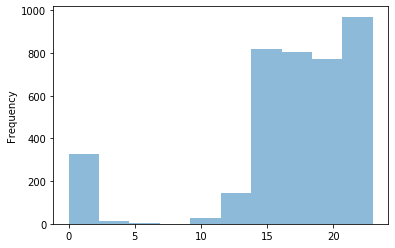

In [100]:
city_search[city_search['country'] == "US"]['hour'].plot.hist(alpha=0.5)

**Unknown Country User**

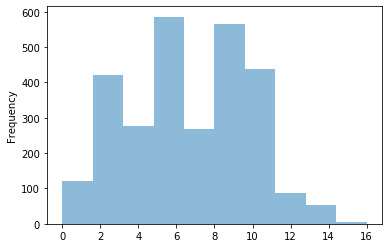

In [101]:
city_search[city_search['country'] == "Unknown"]['hour'].plot.hist(alpha=0.5)

### Visualize all countries' time distribution

No handles with labels found to put in legend.


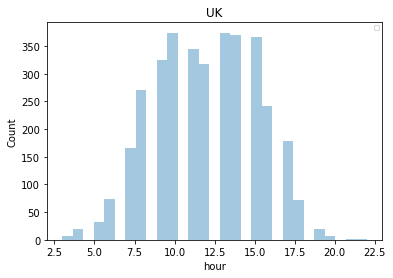

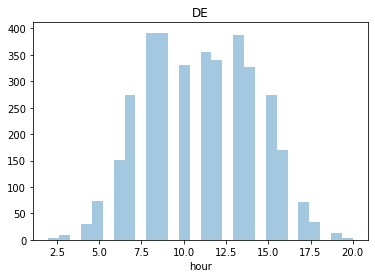

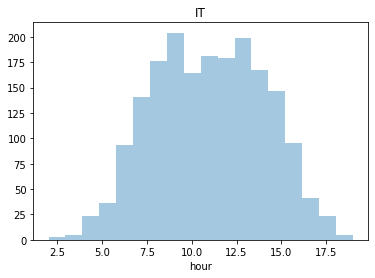

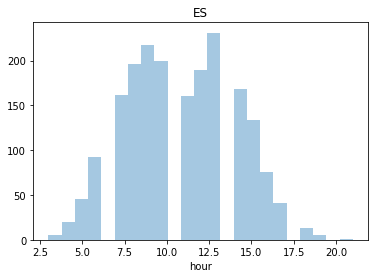

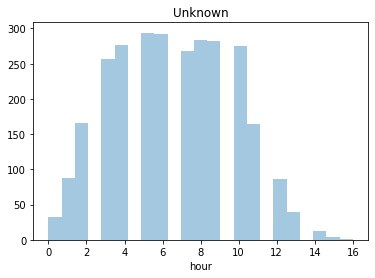

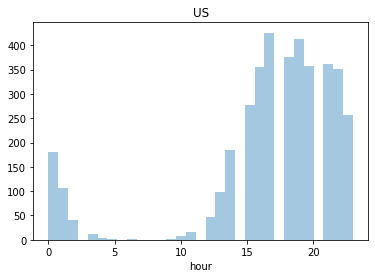

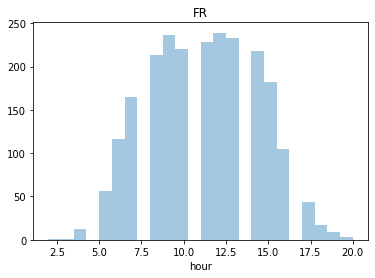

In [106]:
plt.legend(prop={'size': 6})
plt.ylabel('Count')
for c in city_search['country'].unique():
    plt.title(c)
    sns.distplot(city_search[city_search['country'] == c]['hour'],  kde=False, label=c)
    plt.show()
    

No handles with labels found to put in legend.


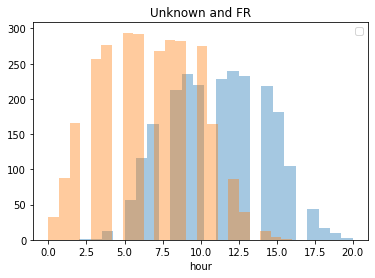

In [108]:
plt.legend()
plt.title('Unknown and FR')
sns.distplot(city_search[city_search['country'] == "FR"]['hour'],  kde=False, label="FR")
sns.distplot(city_search[city_search['country'] == "Unknown"]['hour'],  kde=False, label="Unknown")
plt.show()

No handles with labels found to put in legend.


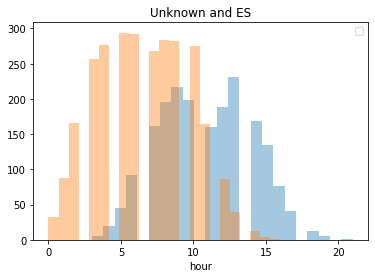

In [109]:
plt.legend()
plt.title('Unknown and ES')
sns.distplot(city_search[city_search['country'] == "ES"]['hour'],  kde=False, label="FR")
sns.distplot(city_search[city_search['country'] == "Unknown"]['hour'],  kde=False, label="Unknown")
plt.show()

- It look like the unknown country is a few hours behind France and Spain in its time zone 

My best guess ot the unknown country is:
**Canada** <br>
Because Canada is 5,6 hours earlier than Spain and France
![title](https://c.tadst.com/gfx/750x500/timezone-map5.png?1)

## Question 2

### Recommendation based on colloborative filtering 
- we will use k nearest neighbors function to recommend a city based on input

In [112]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 40
algorithm = 'brute'
metric = 'cosine'

knn = NearestNeighbors(n_neighbors, algorithm=algorithm, metric=metric)
knn.fit(user_city_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                 radius=1.0)

In [115]:
dist, index = knn.kneighbors(user_city_mat[0:1])
index

array([[ 5754, 10192, 14854,  2517,  1817,  7399,     0,  6834,  3658,
         1853, 18675,  8127, 15022, 13515,  3787,  5454,  2869,  7324,
         5384,  1001, 18731, 12337, 11567, 16122,   667,  6492,  9276,
         4752,  5909,  2303, 14567,  7102, 12435,  1041,  6536,  5864,
        16223, 18374, 11162, 16525]], dtype=int64)

In [121]:
print(city_search.iloc[0, :]['cities'])
print(city_search.iloc[5754, :]['cities'])
print(city_search.iloc[10192, :]['cities'])
print(city_search.iloc[14854, :]['cities'])
print(city_search.iloc[2517, :]['cities'])

['New York NY', 'Newark NJ']
['New York NY', 'Newark NJ']
['New York NY', 'Newark NJ']
['New York NY', 'Newark NJ']
['New York NY', 'Newark NJ']


## Problem* too many duplicates points
- these points have exactly same features and not useful to make prediction <br>
### Solution: using custome metric and remove the duplicate points

In [127]:
from scipy.spatial import distance
def custom_metric(x, y):
    # return the max difference = 1 if two arrays are same
    if np.array_equal(x,y):
        return 1
    # otherwise return the cosine difference 
    return distance.cosine(x, y)

n_neighbors = 50
algorithm = 'brute'
metric = custom_metric

knn2 = NearestNeighbors(n_neighbors, algorithm=algorithm, metric=custom_metric)
knn2.fit(user_city_mat)

NearestNeighbors(algorithm='brute', leaf_size=30,
                 metric=<function custom_metric at 0x00000283DD528598>,
                 metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                 radius=1.0)

In [128]:
dist, index = knn2.kneighbors(user_city_mat[0:1])
index

array([[ 5479, 12013, 16394,  1756, 17330, 19677,  7722,  4839, 13208,
        15508, 12279,   641, 19917,  7074,  7708, 13975,  2261,  2268,
         3068,  8603,  9882,   173,   674, 14271,  4090,  6875,  8855,
         3710,  9381,  2495,  5041, 16032,  5031, 12546,  2473,  5020,
          665,  5019,  6821, 12021, 10214, 12526,  2427,  2420,  2417,
         1304,  3672, 18270, 17911, 16423]], dtype=int64)

In [129]:
print(city_search.iloc[0, :]['cities'])
print(city_search.iloc[12526, :]['cities'])
print(city_search.iloc[3710, :]['cities'])
print(city_search.iloc[2495, :]['cities'])
print(city_search.iloc[10214, :]['cities'])

['New York NY', 'Newark NJ']
['New York NY', 'Newark NJ', 'Philadelphia PA']
['New York NY', 'Jersey City NJ', 'Newark NJ']
['New York NY', 'Jersey City NJ', 'Newark NJ']
['New York NY', 'Jersey City NJ', 'Newark NJ']


**Now the N neighbors does not return the duplicate points anymore**

## Make Prediction (Recommendation) Function with K Neighbors 

In [132]:
def predict(knn, query_string, num_neigh=50):
    query_arr, query_index = cities_to_array(query_string)
    query_arr = query_arr.reshape(-1, len(city_to_index))
    dists, index = knn.kneighbors(query_arr, n_neighbors=num_neigh)
    ret_arr = np.zeros(len(city_to_index))
    for i in index.flatten():
        ret_arr += user_city_mat[i]
    for i in query_index:
        ret_arr[i] = 0
    return index_to_city[np.argmax(ret_arr / num_neigh)]

In [133]:
predict(knn2, ['San Jose CA'])

'Oakland CA'

In [134]:
predict(knn2, ['San Jose CA', 'Oakland CA'])

'San Francisco CA'

![title](http://toursmaps.com/wp-content/uploads/2016/07/bay_area_airports.gif)

### Matrix Factorization (Latency Factor) Approach

In [148]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_city_mat.astype(float), k = 20)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings[0] -= user_city_mat[0]
index_to_city[np.argmax(all_user_predicted_ratings[0])]
# np.argmax(all_user_predicted_ratings[0])


'Jersey City NJ'

## Question3 
There are few features describing each user: user id, joining date and country. Are these features useful to predict the most likely city to be searched? How do they compare to the other features tried in Question 2 (i.e. previous cities searched)? Can the algorithm implemented in Question 2 be improved by making use of these features? <br>
### the answer is yes 
1. We can aggregate the data by user_id to put all the search done by this search together
2. We can one hot encode the counties and include them as a feature
3. the length of how long they have been using the service can be also an feature 

### Part 1 Aggregate by user_id
- put every city user clicked in one row
- that way knn will not pick up too many points from the same user 

In [138]:
city_search[city_search['user_id'] == 4314].iloc[1:5, 7:]

,Anaheim CA,Arlington TX,Atlanta GA,Austin TX,Bakersfield CA,Baltimore MD,Birmingham AL,Boston MA,Buffalo NY,Calgary AB,...,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON,hour
3454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
3998,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,12
4168,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18


In [141]:
city_search[city_search['user_id'] == 4314].groupby('user_id').max().iloc[0:1, 7:]

,Atlanta GA,Austin TX,Bakersfield CA,Baltimore MD,Birmingham AL,Boston MA,Buffalo NY,Calgary AB,Chandler AZ,Charlotte NC,...,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON,hour
user_id,,,,,,,,,,,,,,,,,,,,,
4314,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,21


#### By grouping them by user_id and aggreting with the max, we can remove all the user duplicated rows and can put every city the user checked in a single row

### Part2: One hot encode the country features 

In [142]:
one_hot_country = pd.get_dummies(city_search['country'])
one_hot_country.head()

,DE,ES,FR,IT,UK,US,Unknown
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0


In [182]:
# city_search = city_search.join(one_hot_country)

### Part3: Using Two features, joining date and session time, to make a new feature which indicate how long the user has been active, but we also need to normalize

In [150]:
city_search['join_time'] = city_search['user'].apply(lambda x:datetime.strptime(x['joining_date'], '%Y-%m-%d'))
city_search['join_time'].head()

0   2015-03-22
1   2015-03-28
2   2015-03-06
3   2015-03-12
4   2015-02-28
Name: join_time, dtype: datetime64[ns]

In [155]:
city_search['active_days'] = city_search['time'] - city_search['join_time']
city_search['active_days'] = city_search['active_days'].apply(lambda x:x.days)
city_search['active_days'].head()

0    179
1    160
2    176
3     13
4     63
Name: active_days, dtype: int64

### Next, we need to normalize to scale it from 0 - 1 this feature

In [169]:
clean_data(load_data()).head()

,cities,session_id,unix_timestamp,user,time,user_id,country,Anaheim CA,Arlington TX,Atlanta GA,...,Toledo OH,Toronto ON,Tucson AZ,Tulsa OK,Vancouver BC,Victoria BC,Virginia Beach VA,WASHINGTON DC,Wichita KS,Windsor ON
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"{'user_id': 2024, 'joining_date': '2015-03-22'...",2015-09-17 15:28:28,2024,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"{'user_id': 2853, 'joining_date': '2015-03-28'...",2015-09-04 08:06:31,2853,DE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"{'user_id': 10958, 'joining_date': '2015-03-06...",2015-08-29 10:18:10,10958,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"{'user_id': 7693, 'joining_date': '2015-03-12'...",2015-03-25 07:21:03,7693,IT,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"{'user_id': 7506, 'joining_date': '2015-02-28'...",2015-05-02 09:31:07,7506,UK,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
def get_input_matrix():
    df = clean_data(load_data())[:1000]
    df['join_time'] = df['user'].apply(lambda x:datetime.strptime(x['joining_date'], '%Y-%m-%d'))
    df['active_days'] = df['time'] - df['join_time']
    df['active_days'] = df['active_days'].apply(lambda x:x.days)
    df = df.groupby('user_id').max()
    df = df.reset_index(drop=True)
    df = df.join(pd.get_dummies(city_search['country']))
    columns_todrop = ['cities','session_id', 'unix_timestamp', 'time', 'country', 'join_time']
    df = df.drop(columns=columns_todrop)
    
    input_mat = df.values
    return input_mat
df = get_input_matrix()
df.head()

,Anaheim CA,Arlington TX,Atlanta GA,Austin TX,Bakersfield CA,Baltimore MD,Birmingham AL,Boston MA,Buffalo NY,Calgary AB,...,Wichita KS,Windsor ON,active_days,DE,ES,FR,IT,UK,US,Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,116,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,76,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,88,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,25,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,1,0,0


In [175]:
df.values

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [185]:
city_search.head()

,cities,session_id,unix_timestamp,user,time,user_id,country,Anaheim CA,Arlington TX,Atlanta GA,...,hour,,DE,ES,FR,IT,UK,US,join_time,active_days
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"{'user_id': 2024, 'joining_date': '2015-03-22'...",2015-09-17 15:28:28,2024,UK,0,0,0,...,15,0,0,0,0,0,1,0,2015-03-22,179
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"{'user_id': 2853, 'joining_date': '2015-03-28'...",2015-09-04 08:06:31,2853,DE,0,0,0,...,8,0,1,0,0,0,0,0,2015-03-28,160
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"{'user_id': 10958, 'joining_date': '2015-03-06...",2015-08-29 10:18:10,10958,UK,0,0,0,...,10,0,0,0,0,0,1,0,2015-03-06,176
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"{'user_id': 7693, 'joining_date': '2015-03-12'...",2015-03-25 07:21:03,7693,IT,0,0,0,...,7,0,0,0,0,1,0,0,2015-03-12,13
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"{'user_id': 7506, 'joining_date': '2015-02-28'...",2015-05-02 09:31:07,7506,UK,0,0,0,...,9,0,0,0,0,0,1,0,2015-02-28,63


## Question 4

In [186]:
temp = city_search[city_search['cities'].map(len) > 1]['cities']
temp.head()

0                          [New York NY, Newark NJ]
1    [New York NY, Jersey City NJ, Philadelphia PA]
4                          [Phoenix AZ, Houston TX]
6                         [Montreal QC, Chicago IL]
7                         [Calgary AB, New York NY]
Name: cities, dtype: object

In [187]:
y = temp.map(lambda x:x.pop())
y.head()

0          Newark NJ
1    Philadelphia PA
4         Houston TX
6         Chicago IL
7        New York NY
Name: cities, dtype: object

In [188]:
temp

0                                            [New York NY]
1                            [New York NY, Jersey City NJ]
4                                             [Phoenix AZ]
6                                            [Montreal QC]
7                                             [Calgary AB]
8                                             [Chicago IL]
13                                            [Toronto ON]
14                                            [Chicago IL]
16                                            [Toronto ON]
18                             [Vancouver BC, Victoria BC]
19                                            [Toronto ON]
20                               [Phoenix AZ, Chandler AZ]
25       [San Antonio TX, Corpus Christi TX, Arlington TX]
26                                        [San Antonio TX]
28                   [Calgary AB, Seattle WA, Victoria BC]
29                                             [Dallas TX]
32                                          [San Diego C

In [189]:
def series_to_arrays(cities):
    ret_arr, _ = cities_to_array(cities[0])
    for row in cities[1:]:
        city_arr, _ =  cities_to_array(row)
        ret_arr = np.vstack((ret_arr, city_arr))
    return ret_arr
        
series_to_arrays(temp[:3])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [190]:
inputs = series_to_arrays(temp[:100])

In [191]:
def predict(query_arr, num_neigh=20):
    query_arr = query_arr.reshape(-1, len(city_to_index))
    dists, index = knn2.kneighbors(query_arr, n_neighbors=num_neigh)
    ret_arr = np.zeros((1, len(city_to_index)))
    for i in index.flatten():
        ret_arr += user_city_mat[i]
    ret_arr /= num_neigh
    ret_arr -= query_arr
    return index_to_city[np.argmax(ret_arr)]

def batch_predict(inputs):
    pred_labels = []
    for x in inputs:
        pred_labels.append(predict(x))
    return pred_labels

outputs = batch_predict(inputs)
outputs

['Los Angeles CA',
 'Newark NJ',
 'Glendale AZ',
 'Toronto ON',
 'New York NY',
 'New York NY',
 'Montreal QC',
 'New York NY',
 'Montreal QC',
 'Portland OR',
 'Montreal QC',
 'Mesa AZ',
 'Houston TX',
 'Houston TX',
 'Vancouver BC',
 'Arlington TX',
 'Los Angeles CA',
 'Glendale AZ',
 'New York NY',
 'New York NY',
 'Oakland CA',
 'Montreal QC',
 'Los Angeles CA',
 'Arlington TX',
 'Toronto ON',
 'Los Angeles CA',
 'New York NY',
 'Long Beach CA',
 'Montreal QC',
 'Long Beach CA',
 'New York NY',
 'New York NY',
 'New York NY',
 'Chicago IL',
 'Scottsdale AZ',
 'Chicago IL',
 'New York NY',
 'Long Beach CA',
 'New York NY',
 'New York NY',
 'New York NY',
 'Los Angeles CA',
 'New York NY',
 'New York NY',
 'Montreal QC',
 'Portland OR',
 'Montreal QC',
 'New York NY',
 'Toronto ON',
 'New York NY',
 'Anaheim CA',
 'New York NY',
 'New York NY',
 'New York NY',
 'Long Beach CA',
 'Montreal QC',
 'Toronto ON',
 'Glendale AZ',
 'Los Angeles CA',
 'Chicago IL',
 'Los Angeles CA',
 'Los A

In [146]:
def simple_accuracy(pred_labels, true_labels):
    pred_series = pd.Series(pred_labels)
    print(true_labels)
    print(pred_series)
# y = y.reset_index().drop(columns=['index'])
simple_accuracy(outputs, y[:100])

             cities
0       New York NY
1    Jersey City NJ
2        Phoenix AZ
3       Montreal QC
4        Calgary AB
5        Chicago IL
6        Toronto ON
7        Chicago IL
8        Toronto ON
9       Victoria BC
10       Toronto ON
11      Chandler AZ
12     Arlington TX
13   San Antonio TX
14      Victoria BC
15        Dallas TX
16     San Diego CA
17       Phoenix AZ
18      San Jose CA
19       Toronto ON
20      Stockton CA
21       Toronto ON
22      New York NY
23        Dallas TX
24      Montreal QC
25      New York NY
26  Philadelphia PA
27   Los Angeles CA
28       Toronto ON
29   Los Angeles CA
..              ...
70   Los Angeles CA
71       Toronto ON
72      Montreal QC
73     Baltimore MD
74      New York NY
75        Newark NJ
76   Los Angeles CA
77   San Antonio TX
78      New York NY
79      New York NY
80        Newark NJ
81       Calgary AB
82       Chicago IL
83       Toronto ON
84     San Diego CA
85      New York NY
86      Montreal QC
87      New York NY


In [203]:
y = y
for x in range(100):
    print(outputs[x], y[x])

Los Angeles CA Newark NJ
Newark NJ Philadelphia PA
Glendale AZ Houston TX
Toronto ON Chicago IL
New York NY New York NY
New York NY New York NY
Montreal QC Kitchener ON
New York NY Vancouver BC
Montreal QC Oshawa ON
Portland OR Seattle WA
Montreal QC New York NY
Mesa AZ Mesa AZ
Houston TX Fort Worth TX
Houston TX Montreal QC
Vancouver BC Portland OR
Arlington TX Arlington TX
Los Angeles CA Santa Ana CA
Glendale AZ Montreal QC
New York NY Toronto ON
New York NY New York NY
Oakland CA Sacramento CA
Montreal QC New York NY
Los Angeles CA Toronto ON
Arlington TX New York NY
Toronto ON New York NY
Los Angeles CA Baltimore MD
New York NY Baltimore MD
Long Beach CA Chicago IL
Montreal QC New York NY
Long Beach CA Long Beach CA
New York NY New York NY
New York NY Milwaukee WI
New York NY Montreal QC
Chicago IL New York NY
Scottsdale AZ Chandler AZ
Chicago IL Chicago IL
New York NY Cincinnati OH
Long Beach CA Montreal QC
New York NY Montreal QC
New York NY Indianapolis IN
New York NY Toronto ON

In [202]:
y = y.reset_index()
y = y['cities']
y

0                         Newark NJ
1                   Philadelphia PA
2                        Houston TX
3                        Chicago IL
4                       New York NY
5                       New York NY
6                      Kitchener ON
7                      Vancouver BC
8                         Oshawa ON
9                        Seattle WA
10                      New York NY
11                          Mesa AZ
12                    Fort Worth TX
13                      Montreal QC
14                      Portland OR
15                     Arlington TX
16                     Santa Ana CA
17                      Montreal QC
18                       Toronto ON
19                      New York NY
20                    Sacramento CA
21                      New York NY
22                       Toronto ON
23                      New York NY
24                      New York NY
25                     Baltimore MD
26                     Baltimore MD
27                       Chi